# Capstone Project
## Machine Learning Engineer Nanodegree
#### Pingping Chen
#### May 10, 2018

## Data Exploration
- Get type of every features.
- Get statistics of important variables
- Identify the categorical variables, missing values, outliers

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import ggplot
import seaborn as sns
color = sns.color_palette()

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/pingpingchen/anaconda/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/pingpingchen/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load 2016 data
train16 = pd.read_csv('train_2016_v2.csv')
properties16 = pd.read_csv('properties_2016.csv')
train16.shape

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(90275, 3)

In [3]:
# Load 2017 data
train17=pd.read_csv('train_2017.csv')
properties17=pd.read_csv('properties_2017.csv')

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Get to see the first five records of properties
properties16.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
# Get to see the first five records of Properties
train16.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [6]:
# Get to know the name of each column, and how many features in each dataset.
print(properties16.columns.values)
print(train16.columns.values)
print(len(properties16.columns.values))
print(len(train16.columns.values))

['parcelid' 'airconditioningtypeid' 'architecturalstyletypeid'
 'basementsqft' 'bathroomcnt' 'bedroomcnt' 'buildingclasstypeid'
 'buildingqualitytypeid' 'calculatedbathnbr' 'decktypeid'
 'finishedfloor1squarefeet' 'calculatedfinishedsquarefeet'
 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15'
 'finishedsquarefeet50' 'finishedsquarefeet6' 'fips' 'fireplacecnt'
 'fullbathcnt' 'garagecarcnt' 'garagetotalsqft' 'hashottuborspa'
 'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
 'poolcnt' 'poolsizesum' 'pooltypeid10' 'pooltypeid2' 'pooltypeid7'
 'propertycountylandusecode' 'propertylandusetypeid' 'propertyzoningdesc'
 'rawcensustractandblock' 'regionidcity' 'regionidcounty'
 'regionidneighborhood' 'regionidzip' 'roomcnt' 'storytypeid'
 'threequarterbathnbr' 'typeconstructiontypeid' 'unitcnt'
 'yardbuildingsqft17' 'yardbuildingsqft26' 'yearbuilt' 'numberofstories'
 'fireplaceflag' 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt'
 'assessmentyear' 'landta

In [7]:
# Merge two different datasets for every year.
train2016=pd.merge(train16, properties16, how = 'left', on = 'parcelid')
train2017=pd.merge(train17, properties17, how = 'left', on = 'parcelid')

In [8]:
# combine two years dataset to get the whole dataset.
df=pd.concat([train2016, train2017], axis=0)

In [9]:
# print all columns' name and how many columns in the whole dataset.
print(df.columns.values)
print(len(df.columns.values))

['parcelid' 'logerror' 'transactiondate' 'airconditioningtypeid'
 'architecturalstyletypeid' 'basementsqft' 'bathroomcnt' 'bedroomcnt'
 'buildingclasstypeid' 'buildingqualitytypeid' 'calculatedbathnbr'
 'decktypeid' 'finishedfloor1squarefeet' 'calculatedfinishedsquarefeet'
 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15'
 'finishedsquarefeet50' 'finishedsquarefeet6' 'fips' 'fireplacecnt'
 'fullbathcnt' 'garagecarcnt' 'garagetotalsqft' 'hashottuborspa'
 'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
 'poolcnt' 'poolsizesum' 'pooltypeid10' 'pooltypeid2' 'pooltypeid7'
 'propertycountylandusecode' 'propertylandusetypeid' 'propertyzoningdesc'
 'rawcensustractandblock' 'regionidcity' 'regionidcounty'
 'regionidneighborhood' 'regionidzip' 'roomcnt' 'storytypeid'
 'threequarterbathnbr' 'typeconstructiontypeid' 'unitcnt'
 'yardbuildingsqft17' 'yardbuildingsqft26' 'yearbuilt' 'numberofstories'
 'fireplaceflag' 'structuretaxvaluedollarcnt' 'taxvaluedollarc

In [10]:
# Get to see the first five records of the whole dataset.
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [11]:
# Simple way to describe the dataset and get the simple statistical numbers.
df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,1.678880e+05,167888.000000,53788.000000,468.000000,93.000000,167854.000000,167854.000000,31.000000,107173.000000,166056.000000,...,165.000000,166828.000000,38169.000000,1.673590e+05,1.678520e+05,167854.000000,1.678510e+05,167843.000000,4683.000000,1.670020e+05
mean,1.299536e+07,0.013906,1.814345,7.299145,695.376344,2.288265,3.041739,3.967742,6.015461,2.312542,...,271.260606,1968.569311,1.437764,1.843460e+05,4.726833e+05,2015.462181,2.888805e+05,5989.515575,13.827247,6.049390e+13
std,3.016071e+06,0.165706,2.970239,2.719633,583.952144,1.000835,1.149134,0.179605,1.882799,0.977808,...,293.611447,23.777202,0.544508,2.192841e+05,6.028372e+05,0.498569,4.456451e+05,7214.731946,2.421658,1.054137e+12
min,1.071174e+07,-4.655420,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,...,12.000000,1824.000000,1.000000,4.400000e+01,2.200000e+01,2015.000000,2.200000e+01,19.920000,3.000000,6.037101e+13
25%,1.154899e+07,-0.025300,1.000000,7.000000,280.000000,2.000000,2.000000,4.000000,4.000000,2.000000,...,88.000000,1953.000000,1.000000,8.256800e+04,2.026522e+05,2015.000000,8.373000e+04,2798.070000,13.000000,6.037312e+13
50%,1.254060e+07,0.006000,1.000000,7.000000,588.000000,2.000000,3.000000,4.000000,7.000000,2.000000,...,160.000000,1970.000000,1.000000,1.340510e+05,3.500000e+05,2015.000000,1.977760e+05,4501.040000,14.000000,6.037604e+13
75%,1.421930e+07,0.039200,1.000000,7.000000,819.000000,3.000000,4.000000,4.000000,7.000000,3.000000,...,320.000000,1987.000000,2.000000,2.142570e+05,5.540020e+05,2016.000000,3.553340e+05,6914.165000,15.000000,6.059042e+13
max,1.676893e+08,5.262999,13.000000,21.000000,3560.000000,20.000000,16.000000,4.000000,12.000000,20.000000,...,1366.000000,2016.000000,6.000000,1.142179e+07,4.906124e+07,2016.000000,4.895220e+07,586639.300000,99.000000,4.830301e+14


In [12]:
# to get the type of each column
print(df.dtypes)

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


In [13]:
# check if there is any missing value in each column
df.isnull().any()

parcelid                        False
logerror                        False
transactiondate                 False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                      True
bedroomcnt                       True
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                             True
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsystemtypeid            True
latitude    

In [14]:
# calculate how many missing values in each column
df.isnull().sum()

parcelid                             0
logerror                             0
transactiondate                      0
airconditioningtypeid           114100
architecturalstyletypeid        167420
basementsqft                    167795
bathroomcnt                         34
bedroomcnt                          34
buildingclasstypeid             167857
buildingqualitytypeid            60715
calculatedbathnbr                 1832
decktypeid                      166616
finishedfloor1squarefeet        154995
calculatedfinishedsquarefeet       896
finishedsquarefeet12              8369
finishedsquarefeet13            167813
finishedsquarefeet15            161297
finishedsquarefeet50            154995
finishedsquarefeet6             167081
fips                                34
fireplacecnt                    149992
fullbathcnt                       1832
garagecarcnt                    112431
garagetotalsqft                 112431
hashottuborspa                  163984
heatingorsystemtypeid    

In [15]:
# statistics about the target variable - logerror
df['logerror'].describe()

count    167888.000000
mean          0.013906
std           0.165706
min          -4.655420
25%          -0.025300
50%           0.006000
75%           0.039200
max           5.262999
Name: logerror, dtype: float64

In [16]:
df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,1.678880e+05,167888.000000,53788.000000,468.000000,93.000000,167854.000000,167854.000000,31.000000,107173.000000,166056.000000,...,165.000000,166828.000000,38169.000000,1.673590e+05,1.678520e+05,167854.000000,1.678510e+05,167843.000000,4683.000000,1.670020e+05
mean,1.299536e+07,0.013906,1.814345,7.299145,695.376344,2.288265,3.041739,3.967742,6.015461,2.312542,...,271.260606,1968.569311,1.437764,1.843460e+05,4.726833e+05,2015.462181,2.888805e+05,5989.515575,13.827247,6.049390e+13
std,3.016071e+06,0.165706,2.970239,2.719633,583.952144,1.000835,1.149134,0.179605,1.882799,0.977808,...,293.611447,23.777202,0.544508,2.192841e+05,6.028372e+05,0.498569,4.456451e+05,7214.731946,2.421658,1.054137e+12
min,1.071174e+07,-4.655420,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,...,12.000000,1824.000000,1.000000,4.400000e+01,2.200000e+01,2015.000000,2.200000e+01,19.920000,3.000000,6.037101e+13
25%,1.154899e+07,-0.025300,1.000000,7.000000,280.000000,2.000000,2.000000,4.000000,4.000000,2.000000,...,88.000000,1953.000000,1.000000,8.256800e+04,2.026522e+05,2015.000000,8.373000e+04,2798.070000,13.000000,6.037312e+13
50%,1.254060e+07,0.006000,1.000000,7.000000,588.000000,2.000000,3.000000,4.000000,7.000000,2.000000,...,160.000000,1970.000000,1.000000,1.340510e+05,3.500000e+05,2015.000000,1.977760e+05,4501.040000,14.000000,6.037604e+13
75%,1.421930e+07,0.039200,1.000000,7.000000,819.000000,3.000000,4.000000,4.000000,7.000000,3.000000,...,320.000000,1987.000000,2.000000,2.142570e+05,5.540020e+05,2016.000000,3.553340e+05,6914.165000,15.000000,6.059042e+13
max,1.676893e+08,5.262999,13.000000,21.000000,3560.000000,20.000000,16.000000,4.000000,12.000000,20.000000,...,1366.000000,2016.000000,6.000000,1.142179e+07,4.906124e+07,2016.000000,4.895220e+07,586639.300000,99.000000,4.830301e+14


## EXploratory Visualization

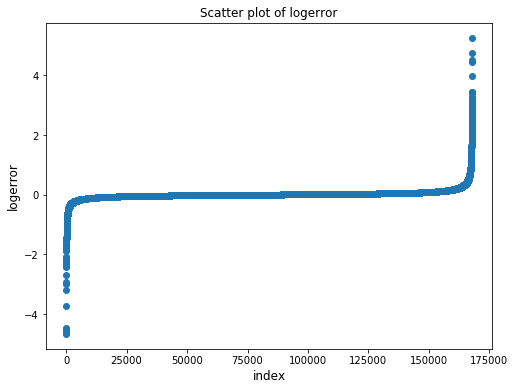

In [17]:
# let's see scatter plot of target variable 'logerror'
plt.figure(figsize = (8,6))
plt.scatter(range(df.shape[0]), np.sort(df.logerror.values))
plt.title('Scatter plot of logerror')
plt.xlabel('index', fontsize = 12)
plt.ylabel('logerror', fontsize = 12)

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/pingpingchen/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


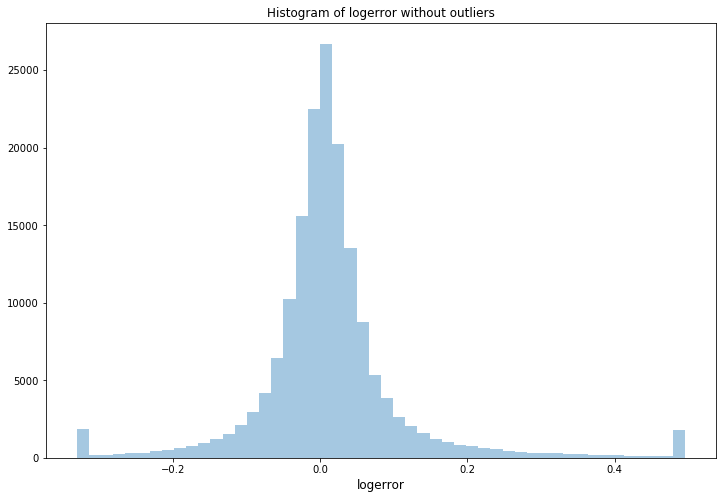

In [18]:
# remove outliers at both tails and plot the histogram
ulimit = np.percentile(df.logerror.values, 99)
llimit = np.percentile(df.logerror.values, 1)
df['logerror'].ix[df['logerror'] > ulimit] = ulimit
df['logerror'].ix[df['logerror'] < llimit] = llimit

plt.figure(figsize = (12, 8))
sns.distplot(df.logerror.values, bins = 50, kde = False)
plt.title('Histogram of logerror without outliers')
plt.xlabel('logerror', fontsize = 12)


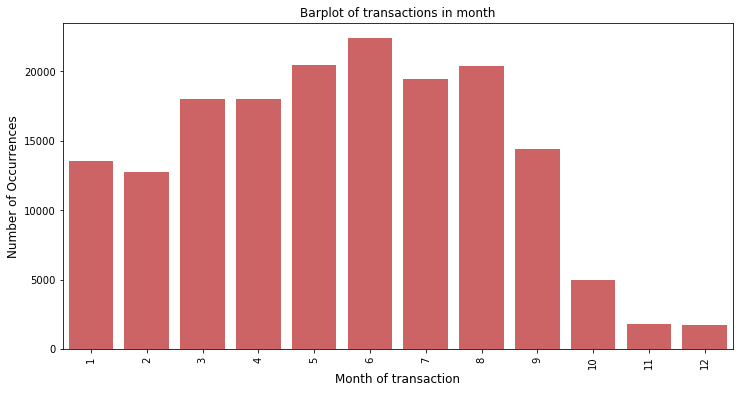

In [19]:
# check the number of transactions in each month.
df['transactiondate'] = pd.to_datetime(df['transactiondate'], errors = 'coerce')
df['transaction_month'] = df['transactiondate'].dt.month

cnt_srs = df['transaction_month'].value_counts()
plt.figure(figsize = (12, 6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha = 0.8, color = color[3])
plt.xticks(rotation = 'vertical')
plt.title('Barplot of transactions in month')
plt.xlabel('Month of transaction', fontsize = 12)
plt.ylabel('Number of Occurrences', fontsize = 12)

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


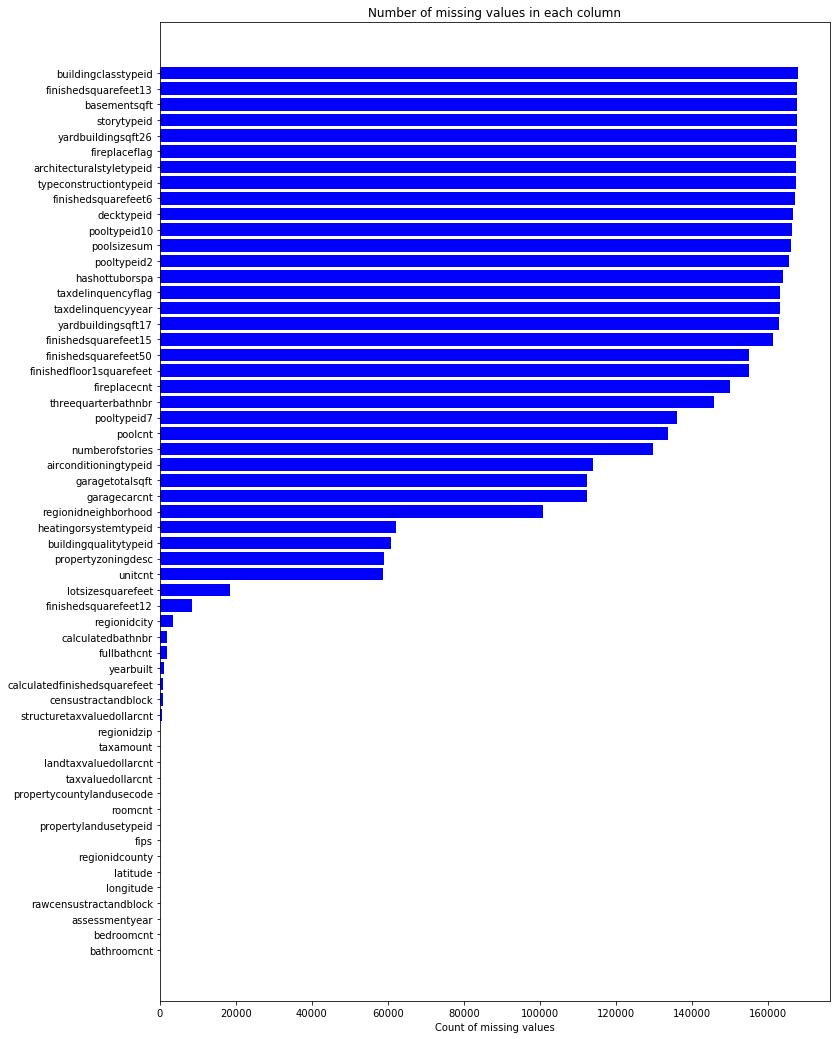

In [20]:
missing_df = df.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by = 'missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize = (12, 18))
rects = ax.barh(ind, missing_df.missing_count.values, color = 'blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation = 'horizontal')
ax.set_xlabel('Count of missing values')
ax.set_title('Number of missing values in each column')

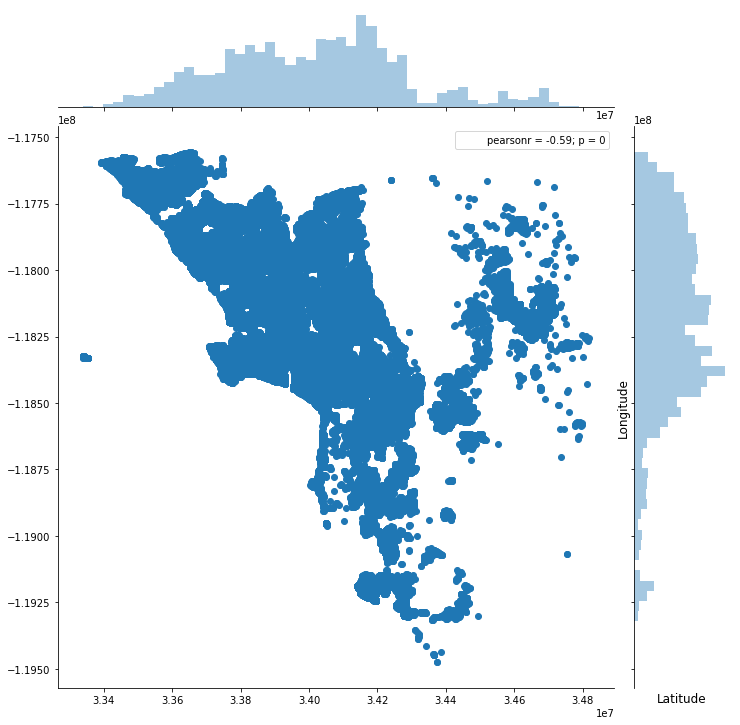

In [21]:
# explore the latitude and longitude varaible
plt.figure(figsize = (12, 12))
sns.jointplot(x=df.latitude.values, y=df.longitude.values, size = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)

In [22]:
# check the dtypes of different types of variable.
pd.options.display.max_rows = 65

dtype_df = df.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column Type']
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,airconditioningtypeid,float64
4,architecturalstyletypeid,float64
5,basementsqft,float64
6,bathroomcnt,float64
7,bedroomcnt,float64
8,buildingclasstypeid,float64
9,buildingqualitytypeid,float64


In [23]:
# count the number of different typesa
dtype_df.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [24]:
# check the number of Nulls in the dataset
missing_df = df.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_df.ix[missing_df['missing_ratio'] > 0.999]

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,column_name,missing_count,missing_ratio
5,basementsqft,167795,0.999446
8,buildingclasstypeid,167857,0.999815
15,finishedsquarefeet13,167813,0.999553
43,storytypeid,167795,0.999446
48,yardbuildingsqft26,167723,0.999017


### Univariate Analysis:
Get the correlation between float variables and the target variable to see how they are related.

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/pingpingchen/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


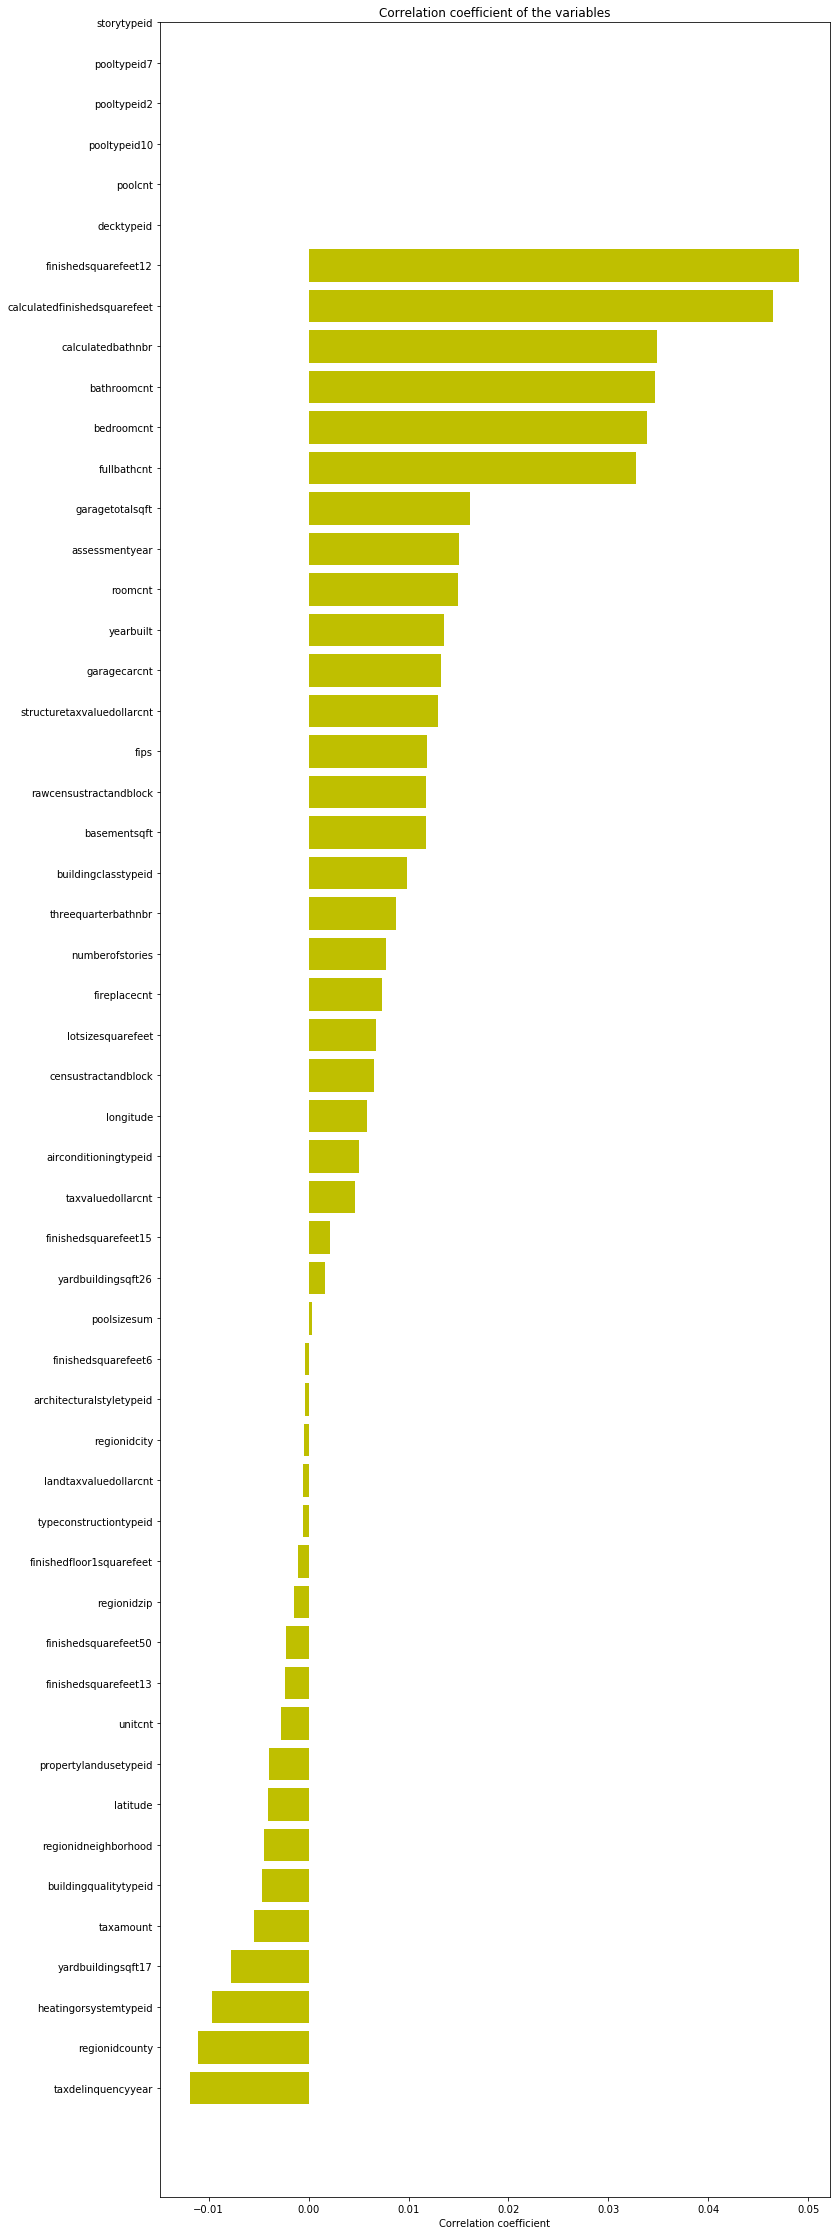

In [25]:
# Let us just impute the missing values with mean values to compute correlation coefficients
mean_values = df.mean(axis = 0)
df_new = df.fillna(mean_values, inplace = True)

x_cols = [col for col in df_new.columns if col not in ['logerror'] if df_new[col].dtype == 'float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df_new[col].values, df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize = (12, 40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color = 'y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation = 'horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the variables')

In [26]:
# let's check if these variables who have no correlation values have only one unique value
corr_zero_cols = ['storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid']
for col in corr_zero_cols:
    print(col, len(df_new[col].unique()))

('storytypeid', 1)
('pooltypeid2', 1)
('pooltypeid7', 1)
('pooltypeid10', 1)
('poolcnt', 1)
('decktypeid', 1)


In [27]:
# get the variables with high correlation values 
corr_df_sel = corr_df.ix[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,col_labels,corr_values
50,taxdelinquencyyear,-0.011833
33,regionidcounty,-0.011037
18,fullbathcnt,0.032768
4,bedroomcnt,0.033868
3,bathroomcnt,0.034663
7,calculatedbathnbr,0.034883
10,calculatedfinishedsquarefeet,0.046444
11,finishedsquarefeet12,0.049083


/Users/pingpingchen/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


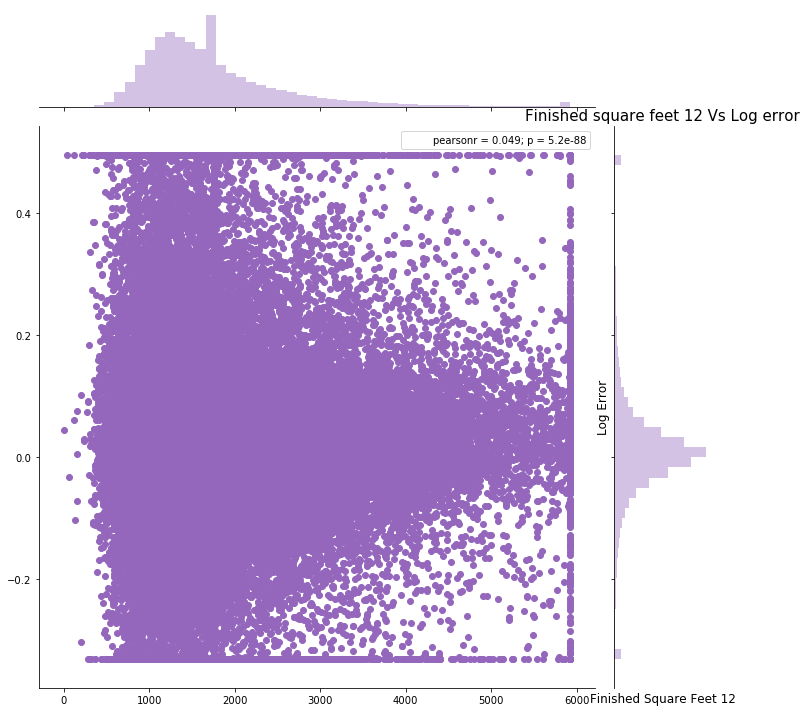

In [28]:
# let's see how the finished square feet 12 varies with the log error
col = 'finishedsquarefeet12'
ulimit = np.percentile(df[col].values, 99.5)
llimt = np.percentile(df[col].values, 0.05)
df[col].ix[df[col] > ulimit] = ulimit
df[col].ix[df[col] < llimit] = llimit

plt.figure(figsize = (12, 12))
sns.jointplot(x = df.finishedsquarefeet12.values, y = df.logerror.values, size = 10, color = color[4])
plt.ylabel('Log Error', fontsize = 12)
plt.xlabel('Finished Square Feet 12', fontsize = 12)
plt.title('Finished square feet 12 Vs Log error', fontsize = 15)

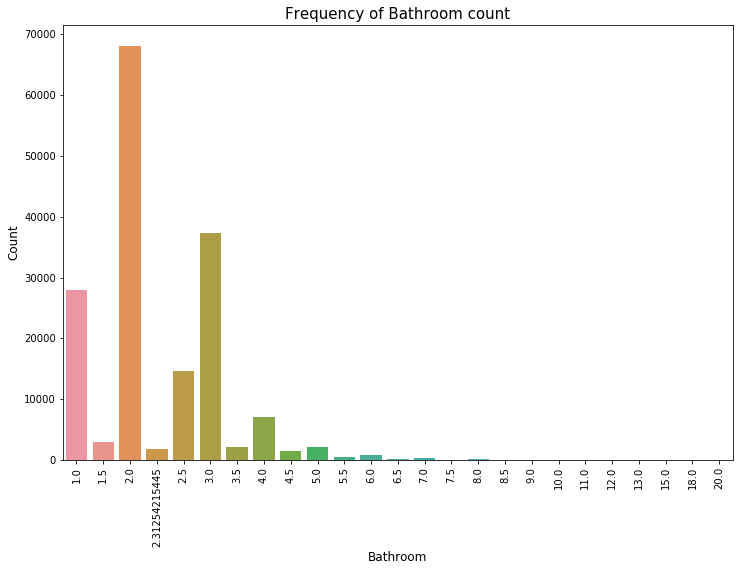

In [29]:
plt.figure(figsize = (12, 8))
sns.countplot(x='calculatedbathnbr', data = df)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Bathroom', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.title('Frequency of Bathroom count', fontsize = 15)

In [30]:
df.columns.values

array(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips',
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'hashottuborspa', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'unitcn

#### Benchmark
- Deal with missing values in each every column
    - dealing with missing values, filling all missing value with their columns' average.
    - replace missing values in `hashottuborspa` with 0, and replace `True` to 1
    - replace missing values in `fireplaceflag` with 0, and replace `True` to 1
    - replace missing values in `taxdelinquencyflag` with 0, and replace `Y` to 1
- Implement Multiple Linear Regression on full dataset
    - split the full dataset into training and testing by using `train_test_split()`
    - fit the multiple linear regression on the training dataset
    - predict the testing dataset, and calculate R^2, MAE, and MSE
- Feature selection
    - build a pipeline to tune the best-k in `SelectKBest` function
    - fit the multiple linear regression on different subset training dataset according to the number of features
    - predict the testing dataset, and calculate R^2, MAE and MSE
    - get the best parameters from the feature selection section

In [31]:
# get a new dataset 
df_data = df

In [32]:
df_data['hashottuborspa'] = df_data.hashottuborspa.replace(np.NaN, 0)
df_data['hashottuborspa'] = df_data.hashottuborspa.replace(True, 1)

In [33]:
df_data['fireplaceflag'] = df_data.fireplaceflag.replace(np.NaN, 0)
df_data['fireplaceflag'] = df_data.fireplaceflag.replace(True, 1)

In [34]:
df_data['taxdelinquencyflag'] = df_data.taxdelinquencyflag.replace(np.NaN, 0)
df_data['taxdelinquencyflag'] = df_data.taxdelinquencyflag.replace('Y', 1)

In [35]:
df_data['taxdelinquencyflag'].unique()

array([0, 1])

In [36]:
# filling missing values with their columns' mean
df_data = df_data.fillna(mean_values, inplace = True)

In [37]:
len(df_data.columns.values)

61

In [38]:
# implement multiple linear regression
from sklearn.model_selection import train_test_split
x = df_data.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month', 
                  "propertycountylandusecode", "propertyzoningdesc"], axis = 1)
y = df_data['logerror']

x = x.values
y = y.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.linear_model import LinearRegression

# Multiple linear regression
lr = LinearRegression(fit_intercept = False, normalize = True)
lr.fit(x_train, y_train)

# predict on testing dataset
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# r^2 score
print ('The R^2 value of the training dataset is: ', r2_score(y_train, lr.predict(x_train)))
print ('The R^2 value of the testing dataset is: ', r2_score(y_test, y_pred))
print ('The Mean Squared Error of testing dataset is: ', mean_squared_error(y_test, y_pred))
print ('The Mean Squared Error of training dataset is: ', mean_squared_error(y_train, lr.predict(x_train)))
print ('The Mean Absolute Error of testing dataset is: ', mean_absolute_error(y_test, y_pred))
print ('The Mean Absolute Error of training dataset is: ', mean_absolute_error(y_train, lr.predict(x_train)))

('The R^2 value of the training dataset is: ', 0.0076941919938394721)
('The R^2 value of the testing dataset is: ', 0.0085079949598333426)
('The Mean Squared Error of testing dataset is: ', 0.010502920421457642)
('The Mean Squared Error of training dataset is: ', 0.010420982487539442)
('The Mean Absolute Error of testing dataset is: ', 0.061085232214669029)
('The Mean Absolute Error of training dataset is: ', 0.060650930945347445)


In [39]:
# using pipeline to do feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline([('select', SelectKBest(f_regression)),
                ('linear_regression', LinearRegression(fit_intercept = False))])

param_grid = {
    'select__k':[2, 4, 6, 8, 10, 12, 14, 15, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 44, 50, 54, 55]
}

model = GridSearchCV(pipe, param_grid)
model.fit(x_train, y_train)

print('The R^2 value of the training dataset is: ', r2_score(y_train, model.predict(x_train)))
print('The R^2 value of the testing dataset is: ', r2_score(y_test, model.predict(x_test)))
print ('The Mean Squared Error of testing dataset is: ', mean_squared_error(y_test, model.predict(x_test)))
print ('The Mean Squared Error of training dataset is: ', mean_squared_error(y_train, model.predict(x_train)))
print ('The Mean Absolute Error of testing dataset is: ', mean_absolute_error(y_test, model.predict(x_test)))
print ('The Mean Absolute Error of training dataset is: ', mean_absolute_error(y_train, model.predict(x_train)))

/Users/pingpingchen/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
/Users/pingpingchen/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/pingpingchen/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/pingpingchen/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


('The R^2 value of the training dataset is: ', 0.0034696568015679663)
('The R^2 value of the testing dataset is: ', 0.0038176489057927254)
('The Mean Squared Error of testing dataset is: ', 0.010552605472980262)
('The Mean Squared Error of training dataset is: ', 0.010465347648865177)
('The Mean Absolute Error of testing dataset is: ', 0.061096597994531598)
('The Mean Absolute Error of training dataset is: ', 0.060654368682713448)


In [40]:
# how many independent variables are chosen 
model.best_params_

{'select__k': 12}

### Methodology
#### Data Preprocessing
- filling missing values with their medians except `hashottuborspa`, `fireplaceflag`,`taxdelinquencyflag`

In [41]:
df_lgbm = df
df_lgbm['hashottuborspa'] = df_lgbm.hashottuborspa.replace(np.NaN, 0)
df_lgbm['hashottuborspa'] = df_lgbm.hashottuborspa.replace(True, 1)

df_lgbm['fireplaceflag'] = df_lgbm.fireplaceflag.replace(np.NaN, 0)
df_lgbm['fireplaceflag'] = df_lgbm.fireplaceflag.replace(True, 1)

df_lgbm['taxdelinquencyflag'] = df_lgbm.taxdelinquencyflag.replace(np.NaN, 0)
df_lgbm['taxdelinquencyflag'] = df_lgbm.taxdelinquencyflag.replace('Y', 1)

# filling missing values with their columns' mean
median_values = df.median(axis = 0)
df_lgbm = df_lgbm.fillna(median_values, inplace = True)

In [42]:
# create a new varible called age
df_lgbm['transaction_year'] = df_lgbm['transactiondate'].dt.year
df_lgbm['age'] = df_lgbm['transaction_year'] - df_lgbm['yearbuilt']

In [43]:
df_lgbm.columns.values

array(['parcelid', 'logerror', 'transactiondate', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips',
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'hashottuborspa', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'unitcn

In [44]:
# split the data into training and testing 
x = df_lgbm.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month', 
                  "propertycountylandusecode", "propertyzoningdesc", 'yearbuilt'], axis = 1)
y = df_lgbm['logerror']

x = x.values
y = y.values

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# feature transformation
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
# implement LGBM 
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label = y_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'
params['bagging_fraction'] = 0.8
params['sub_feature'] = 0.5
params['bagging_freq'] = 40
params['num_leaves'] = 1000
params['min_data'] = 50

clf = lgb.train(params, d_train, 100)

y_pred = clf.predict(x_test)

print('The R^2 value of the training dataset is: ', r2_score(y_train, clf.predict(x_train)))
print('The R^2 value of the testing dataset is: ', r2_score(y_test, y_pred))
print('The Mean Squared Error of training dataset is: ', mean_squared_error(y_train, clf.predict(x_train)))
print('The Mean Squared Error of testing dataset is: ', mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error of training dataset is: ', mean_absolute_error(y_train, clf.predict(x_train)))
print('The Mean Absolute Error of testing dataset is: ', mean_absolute_error(y_test, y_pred))

('The R^2 value of the training dataset is: ', 0.03378408334020444)
('The R^2 value of the testing dataset is: ', 0.0084107331349202452)
('The Mean Squared Error of training dataset is: ', 0.010146992051699336)
('The Mean Squared Error of testing dataset is: ', 0.010503950720443328)
('The Mean Absolute Error of training dataset is: ', 0.059753683929405541)
('The Mean Absolute Error of testing dataset is: ', 0.060934036656973382)


In [46]:
params = {}
params['learning_rate'] = 0.002
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'
params['bagging_fraction'] = 0.8
params['sub_feature'] = 0.5
params['bagging_freq'] = 40
params['num_leaves'] = 512
params['min_data'] = 500

clf = lgb.train(params, d_train, 400)

y_pred = clf.predict(x_test)
print('The R^2 value of the training dataset is: ', r2_score(y_train, clf.predict(x_train)))
print('The R^2 value of the testing dataset is: ', r2_score(y_test, y_pred))
print('The Mean Squared Error of training dataset is: ', mean_squared_error(y_train, clf.predict(x_train)))
print('The Mean Squared Error of testing dataset is: ', mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error of training dataset is: ', mean_absolute_error(y_train, clf.predict(x_train)))
print('The Mean Absolute Error of testing dataset is: ', mean_absolute_error(y_test, y_pred))

('The R^2 value of the training dataset is: ', 0.020220178071563066)
('The R^2 value of the testing dataset is: ', 0.011137192896352843)
('The Mean Squared Error of training dataset is: ', 0.01028943727183885)
('The Mean Squared Error of testing dataset is: ', 0.010475069206763877)
('The Mean Absolute Error of training dataset is: ', 0.060139026920287067)
('The Mean Absolute Error of testing dataset is: ', 0.060841391464827831)


In [48]:
# final LightGBM model 
params = {}
params['max_bin'] = 10
params['learning_rate'] = 0.002
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l1'
params['bagging_fraction'] = 0.85
params['sub_feature'] = 0.5
params['bagging_freq'] = 40
params['num_leaves'] = 1000
params['min_data'] = 50
params['min_hessian'] = 0.05 
params['verbose'] = 0

clf = lgb.train(params, d_train, 440)

y_pred = clf.predict(x_test)
print('The R^2 value of the training dataset is: ', r2_score(y_train, clf.predict(x_train)))
print('The R^2 value of the testing dataset is: ', r2_score(y_test, y_pred))
print('The Mean Squared Error of training dataset is: ', mean_squared_error(y_train, clf.predict(x_train)))
print('The Mean Squared Error of testing dataset is: ', mean_squared_error(y_test, y_pred))
print('The Mean Absolute Error of training dataset is: ', mean_absolute_error(y_train, clf.predict(x_train)))
print('The Mean Absolute Error of testing dataset is: ', mean_absolute_error(y_test, y_pred))

('The R^2 value of the training dataset is: ', 0.090639410291965872)
('The R^2 value of the testing dataset is: ', 0.018258758651223062)
('The Mean Squared Error of training dataset is: ', 0.0095499096183332341)
('The Mean Squared Error of testing dataset is: ', 0.010399630133105841)
('The Mean Absolute Error of training dataset is: ', 0.058073805768515438)
('The Mean Absolute Error of testing dataset is: ', 0.060701067517656512)


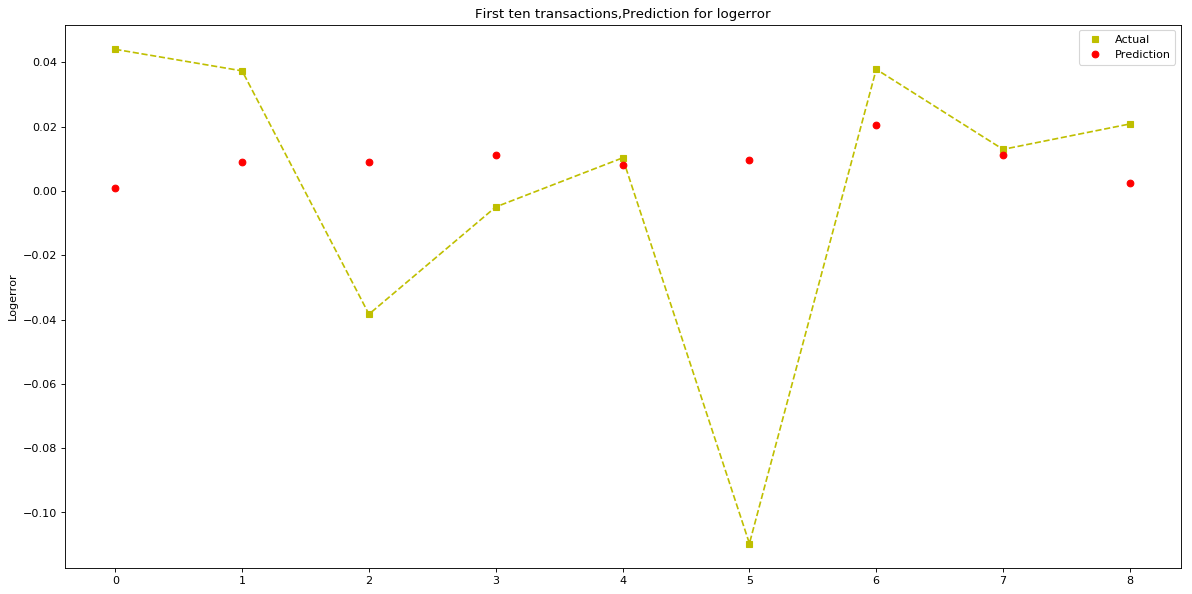

In [53]:
# the first ten rows in the testing dataset
%matplotlib inline
fig = plt.figure(figsize=(18, 9), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.plot(y_test[1:10], 'y--')
p2, = plt.plot(y_test[1:10], 'ys')
p1, = plt.plot(y_pred[1:10], 'ro')
plt.ylabel('Logerror')
plt.legend([p2, p1], ['Actual', 'Prediction'])
plt.title('First ten transactions,Prediction for logerror')